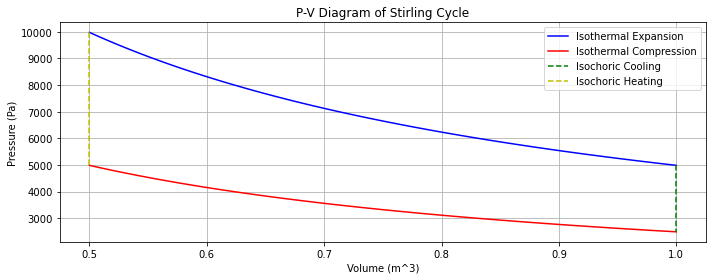

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol*K)

# Stirling cycle parameters
Vmax = 1.0  # Maximum volume in m^3
Vmin = 0.5  # Minimum volume in m^3
Tmax = 600  # Maximum temperature in K
Tmin = 300  # Minimum temperature in K
n = 1.0  # Moles of gas

# Ideal gas law function
def P(T, V, n):
    return n * R * T / V

# Isothermal expansion/compression
def isothermal_process(T, Vmin, Vmax, n, steps=100):
    V = np.linspace(Vmin, Vmax, steps)
    P = n * R * T / V
    S = n * R * np.log(V / Vmin)
    return V, P, S

# Isochoric cooling/heating
def isochoric_process(V, Tmin, Tmax, n, steps=100):
    T = np.linspace(Tmin, Tmax, steps)
    P = n * R * T / V
    S = np.ones_like(T) * n * R * np.log(V / Vmin)
    return T, P, S

# Processes
# 1-2: Isothermal expansion at Tmax
V_expansion, P_expansion, S_expansion = isothermal_process(Tmax, Vmin, Vmax, n)

# 2-3: Isochoric cooling at Vmax
T_cooling, P_cooling, S_cooling = isochoric_process(Vmax, Tmax, Tmin, n)

# 3-4: Isothermal compression at Tmin
V_compression, P_compression, S_compression = isothermal_process(Tmin, Vmax, Vmin, n)

# 4-1: Isochoric heating at Vmin
T_heating, P_heating, S_heating = isochoric_process(Vmin, Tmin, Tmax, n)

# Plotting P-V diagram
plt.figure(figsize=(10, 4))

plt.plot(V_expansion, P_expansion, 'b', label="Isothermal Expansion")
plt.plot(V_compression, P_compression, 'r', label="Isothermal Compression")
plt.plot([Vmax, Vmax], [P_cooling[0], P_cooling[99]], 'g--', label="Isochoric Cooling")
plt.plot([Vmin, Vmin], [P_heating[0], P_heating[-1]], 'y--', label="Isochoric Heating")
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (Pa)')
plt.title('P-V Diagram of Stirling Cycle')
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()


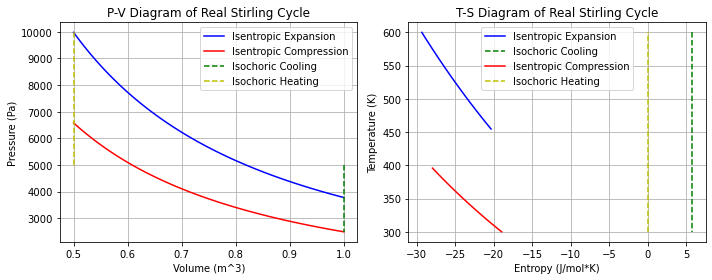

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol*K)

# Stirling cycle parameters
Vmax = 1.0  # Maximum volume in m^3
Vmin = 0.5  # Minimum volume in m^3
Tmax = 600  # Maximum temperature in K
Tmin = 300  # Minimum temperature in K
n = 1.0  # Moles of gas
gamma = 1.4  # Isentropic expansion coefficient for diatomic gases

# Ideal gas law function
def P(T, V, n):
    return n * R * T / V

# Isentropic process function (for both expansion and compression)
def isentropic_process(V1, P1, V2, gamma, steps=100):
    V = np.linspace(V1, V2, steps)
    P = P1 * (V1 / V)**gamma
    T = P * V / (n * R)
    S = n * R * np.log((V**gamma) / (T**(gamma - 1)))
    return V, P, T, S

# Processes
# 1-2: Isentropic expansion
V_expansion, P_expansion, T_expansion, S_expansion = isentropic_process(Vmin, P(Tmax, Vmin, n), Vmax, gamma)

# 2-3: Isochoric cooling at Vmax
T_cooling, P_cooling, S_cooling = isochoric_process(Vmax, Tmax, Tmin, n)

# 3-4: Isentropic compression
V_compression, P_compression, T_compression, S_compression = isentropic_process(Vmax, P_cooling[-1], Vmin, gamma)

# 4-1: Isochoric heating at Vmin
T_heating, P_heating, S_heating = isochoric_process(Vmin, Tmin, Tmax, n)

# Plotting P-V diagram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(V_expansion, P_expansion, 'b', label="Isentropic Expansion")
plt.plot(V_compression, P_compression, 'r', label="Isentropic Compression")
plt.plot([Vmax, Vmax], [P_cooling[0], P_cooling[-1]], 'g--', label="Isochoric Cooling")
plt.plot([Vmin, Vmin], [P_heating[0], P_heating[-1]], 'y--', label="Isochoric Heating")
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (Pa)')
plt.title('P-V Diagram of Real Stirling Cycle')
plt.legend()
plt.grid(True)

# Plotting T-S diagram
plt.subplot(1, 2, 2)
plt.plot(S_expansion, T_expansion, 'b', label="Isentropic Expansion")
plt.plot(S_cooling, T_cooling, 'g--', label="Isochoric Cooling")
plt.plot(S_compression, T_compression, 'r', label="Isentropic Compression")
plt.plot(S_heating, T_heating, 'y--', label="Isochoric Heating")
plt.xlabel('Entropy (J/mol*K)')
plt.ylabel('Temperature (K)')
plt.title('T-S Diagram of Real Stirling Cycle')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


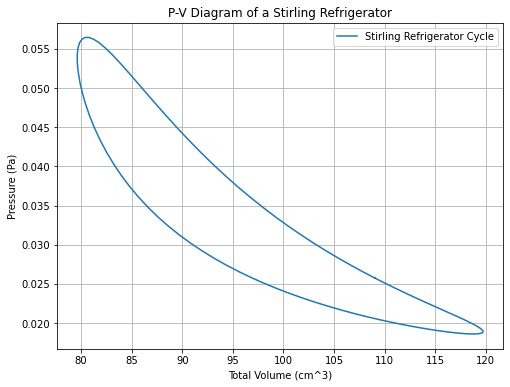

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol*K)
n = 1.0  # Moles of gas
theta = np.linspace(0, 2 * np.pi, 100)  # Represents the crankshaft angle

#  parameters
V_clc = 11.537  # cm^3
V_cle = 8.061  # cm^3
V_swc = 18.744  # cm^3
V_swe = 35.48  # cm^3
V_k = 35.48  # cm^3
V_h = 12.118  # cm^3
V_r = 5.36  # cm^3

# Temperatures
T_h = 1  # K
T_k = 3  # K
#  LMTD
T_r = (T_k - T_h) / np.log(T_k / T_h)


V_c = V_clc + 0.5 * V_swc * (1 + np.cos(theta))
V_e = V_cle + 0.5 * V_swe * (1 + np.cos(theta + np.pi / 2))


V_total = V_c + V_e + V_k + V_h + V_r


P_nR =  (V_c / T_k + V_r / T_r + V_e / T_h)**(-1)

# P-V diagram for the Stirling refrigerator
plt.figure(figsize=(8, 6))
plt.plot(V_total, P_nR, label="Stirling Refrigerator Cycle")
plt.xlabel('Total Volume (cm^3)')
plt.ylabel('Pressure (Pa)')
plt.title('P-V Diagram of a Stirling Refrigerator')
plt.legend()
plt.grid(True)
plt.show()


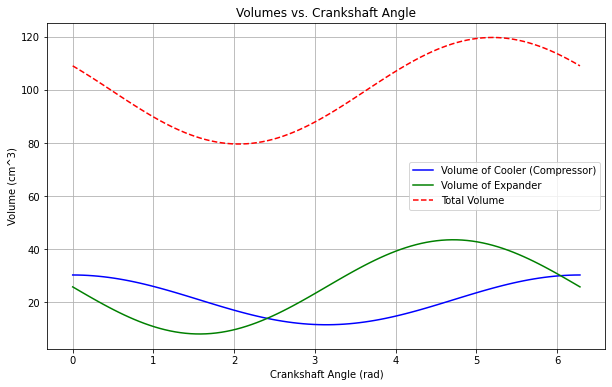

In [4]:
# Plotting the volumes against theta
plt.figure(figsize=(10, 6))

plt.plot(theta, V_c, label="Volume of Cooler (Compressor)", color="blue")
plt.plot(theta, V_e, label="Volume of Expander", color="green")
plt.plot(theta, V_total, label="Total Volume", color="red", linestyle="--")

plt.xlabel('Crankshaft Angle (rad)')
plt.ylabel('Volume (cm^3)')
plt.title('Volumes vs. Crankshaft Angle')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Calculate delta V for cooler and expander
delta_V_c = np.diff(V_c)
delta_V_e = np.diff(V_e)

# Calculate the work done in the cooler and expander
W_c = -np.sum(P_nR[:-1] * delta_V_c)  # The negative sign indicates work done on the system
W_e = -np.sum(P_nR[:-1] * delta_V_e)



print("Work done in the cooler:", W_c, "J")
print("Work done in the expander:", W_e, "J")



Work done in the cooler: 0.5057663659127589 J
Work done in the expander: -0.2000974238610425 J


In [7]:
pip install lmfit 


     |████████████████████████████████| 102 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 28.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


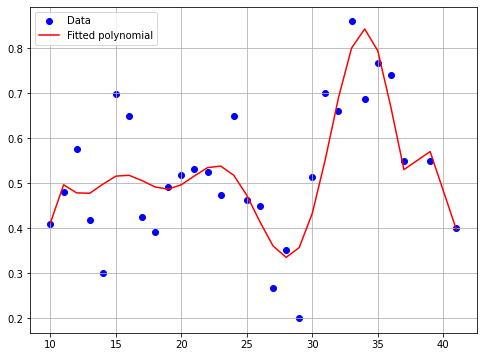

Fitted coefficients:
c0: -1104.7015549707792
c1: 565.6201167165058
c2: -126.91624320295307
c3: 16.437007695626477
c4: -1.360579677531048
c5: 0.07522535397599667
c6: -0.0028144947211975724
c7: 7.040244046314412e-05
c8: -1.1276659756720007e-06
c9: 1.0453480766268525e-08
c10: -4.2631640405047614e-11
R^2 value: 0.65


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model, Parameters

# Read the data from an Excel file
def read_excel_data(file_name):
    df = pd.read_excel(file_name)
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values
    return x, y

# Polynomial function
def polynomial(x, **kwargs):
    return sum([kwargs[f'c{i}'] * (x ** i) for i in range(len(kwargs))])

# Fit the data and plot the original data and fitted polynomial
def fit_and_plot(x, y, degree):
    # Create a model from the polynomial function
    model = Model(polynomial, independent_vars=['x'])
    
    # Create parameters for the polynomial fit
    params = Parameters()
    for i in range(degree + 1):
        params.add(f'c{i}', value=0)

    # Fit the data
    result = model.fit(y, x=x, params=params)

    # Calculate R^2 value
    residuals = y - result.best_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)

    # Plot the original data and the fitted polynomial
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, result.best_fit, color='red', label='Fitted polynomial')
    plt.legend()
    plt.grid(True)
    plt.show()

    return result, r2

# Main execution
file_name = "Lesson5testdata.xlsx"
x_data, y_data = read_excel_data(file_name)
degree = 10

result, r2 = fit_and_plot(x_data, y_data, degree)

print("Fitted coefficients:")
for i in range(degree + 1):
    print(f'c{i}: {result.params[f"c{i}"].value}')
print(f"R^2 value: {r2:.2f}")
